In [33]:
import numpy as np
import pandas as pd
import os
import cv2 as cv
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("GPUs Available: ", tf.test.gpu_device_name())

GPUs Available:  /device:GPU:0


In [3]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
filenames = os.listdir('.../Ungrouped/train/')

categories = []
for filename in filenames:
    category = filename.split(' ')[0]
    if category == 'a': 
        categories.append(0)  
    elif category == 'b': 
        categories.append(1)
    elif category == 'ba':
        categories.append(2)
    elif category == 'be_bi':
        categories.append(3)
    elif category == 'bo_bu':
        categories.append(4)
    elif category == 'd_r': 
        categories.append(5)
    elif category == 'da':
        categories.append(6)
    elif category == 'de_di':
        categories.append(7)
    elif category == 'do_du':
        categories.append(8)
    elif category == 'e_i': 
        categories.append(9)
    elif category == 'g':
        categories.append(10)
    elif category == 'ga':
        categories.append(11)
    elif category == 'ge_gi':
        categories.append(12)
    elif category == 'go_gu': 
        categories.append(13)
    elif category == 'h':
        categories.append(14)
    elif category == 'ha':
        categories.append(15)
    elif category == 'he_hi':
        categories.append(16)
    elif category == 'ho_hu': 
        categories.append(17)
    elif category == 'k':
        categories.append(18)
    elif category == 'ka':
        categories.append(19)
    elif category == 'ke_ki':
        categories.append(20)
    elif category == 'ko_ku': 
        categories.append(21)
    elif category == 'l':
        categories.append(22)
    elif category == 'la':
        categories.append(23)
    elif category == 'le_li':
        categories.append(24)
    elif category == 'lo_lu': 
        categories.append(25)
    elif category == 'm':
        categories.append(26)
    elif category == 'ma':
        categories.append(27)
    elif category == 'me_mi':
        categories.append(28)
    elif category == 'mo_mu': 
        categories.append(29)
    elif category == 'n':
        categories.append(30)
    elif category == 'na':
        categories.append(31)
    elif category == 'ne_ni':
        categories.append(32)
    elif category == 'no_nu':
        categories.append(33)
    elif category == 'ng': 
        categories.append(34)
    elif category == 'nga':
        categories.append(35)
    elif category == 'nge_ngi':
        categories.append(36)
    elif category == 'ngo_ngu': 
        categories.append(37)
    elif category == 'o_u':
        categories.append(38)
    elif category == 'p':
        categories.append(39)
    elif category == 'pa':
        categories.append(40)
    elif category == 'pe_pi': 
        categories.append(41)
    elif category == 'po_pu':
        categories.append(42)
    elif category == 's':
        categories.append(43)
    elif category == 'sa':
        categories.append(44)
    elif category == 'se_si': 
        categories.append(45)
    elif category == 'so_su':
        categories.append(46)
    elif category == 't':
        categories.append(47)
    elif category == 'ta':
        categories.append(48)   
    elif category == 'te_ti': 
        categories.append(49)
    elif category == 'to_tu':
        categories.append(50)
    elif category == 'w':
        categories.append(51)
    elif category == 'wa':
        categories.append(52)
    elif category == 'we_wi': 
        categories.append(53)
    elif category == 'wo_wu':
        categories.append(54)
    elif category == 'y':
        categories.append(55)
    elif category == 'ya':
        categories.append(56)
    elif category == 'ye_yi': 
        categories.append(57)
    elif category == 'yo_yu':
        categories.append(58)
        
df = pd.DataFrame({'filename': filenames, 'character': categories})

In [5]:
df["character"] = df["character"].replace({ 0:'a',1:'b', 2:'ba',3:'bi',4:'bo',5:'d',6:'da',7:'di',8:'do',9:'e',10:'g',
                                            11:'ga',12:'gi',13:'gu',14:'h',15:'ha',16:'hi',17:'ho',18:'k',19:'ka',20:'ki',
                                            21:'ko',22:'l',23:'la',24:'li',25:'lu',26:'m',27:'ma',28:'mi',29:'mu',30:'n',
                                            31:'na',32:'ni',33:'no',34:'ng',35:'nga',36:'ngi',37:'ngu',38:'o',39:'p',40:'pa',
                                            41:'pi',42:'pu',43:'s',44:'sa',45:'si',46:'su',47:'t',48:'ta',49:'ti',50:'tu',
                                            51:'w',52:'wa',53:'wi',54:'wo',55:'y',56:'ya',57:'ye',58:'yo'})

In [6]:
df

,filename,character
0,a (10).jpg,a
1,a (100).jpg,a
2,a (101).jpg,a
3,a (102).jpg,a
4,a (103).jpg,a
...,...,...
47195,yo_yu (994).jpg,yo
47196,yo_yu (995).jpg,yo
47197,yo_yu (997).jpg,yo
47198,yo_yu (998).jpg,yo


In [7]:
classes = df.character.unique()
print(f"{len(classes)} Classes are : {classes}")

59 Classes are : ['a' 'b' 'ba' 'bi' 'bo' 'da' 'di' 'do' 'd' 'e' 'g' 'ga' 'gi' 'gu' 'h' 'ha'
 'hi' 'ho' 'k' 'ka' 'ki' 'ko' 'l' 'la' 'li' 'lu' 'm' 'ma' 'mi' 'mu' 'n'
 'na' 'ni' 'ng' 'nga' 'ngi' 'ngu' 'no' 'o' 'p' 'pa' 'pi' 'pu' 's' 'sa'
 'si' 'su' 't' 'ta' 'ti' 'tu' 'w' 'wa' 'wi' 'wo' 'y' 'ya' 'ye' 'yo']


In [8]:
classLabels = df.groupby(['character']).size().reset_index(name='Freq')
classLabels

,character,Freq
0,a,815
1,b,806
2,ba,805
3,bi,808
4,bo,795
5,d,809
6,da,800
7,di,781
8,do,830
9,e,787


<AxesSubplot:>

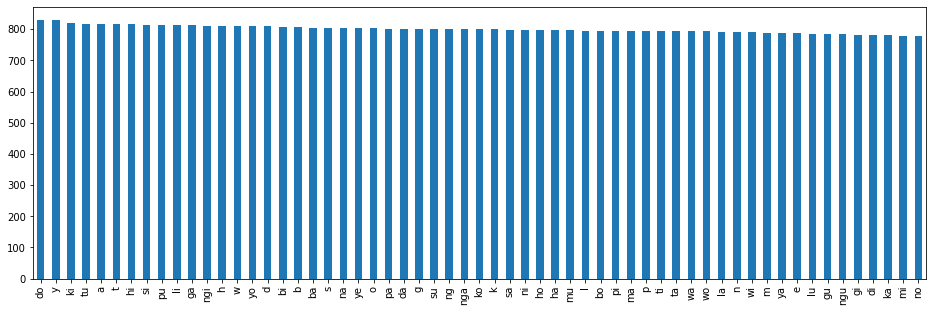

In [9]:
df['character'].value_counts().plot.bar(figsize=(16,5))

In [10]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["character"])
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [11]:
TRAIN_PATH = ".../Ungrouped/train/"
BATCH_SIZE = 64
EPOCHS = 50

In [12]:
image_datagen = ImageDataGenerator(rescale=1./255,)

train_generator = image_datagen.flow_from_dataframe(
    train_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='character',
    target_size=(32,32),
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)
validation_generator = image_datagen.flow_from_dataframe(
    validate_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='character',
    target_size=(32,32),
    class_mode='categorical',
    color_mode='grayscale',
    batch_size=BATCH_SIZE
)

Found 37760 validated image filenames belonging to 59 classes.
Found 9440 validated image filenames belonging to 59 classes.


<AxesSubplot:>

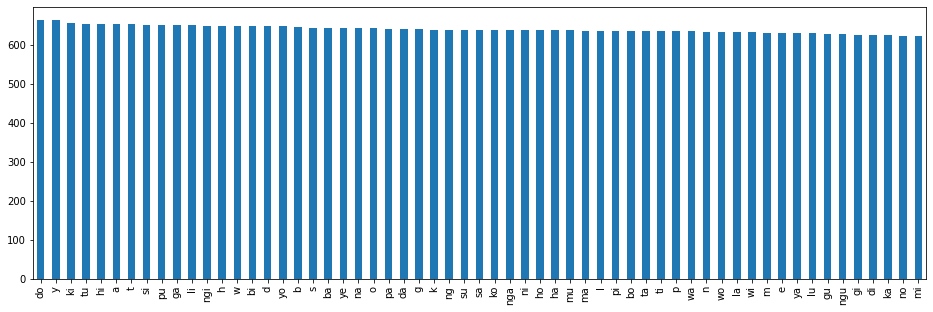

In [13]:
train_df['character'].value_counts().plot.bar(figsize=(16,5))

<AxesSubplot:>

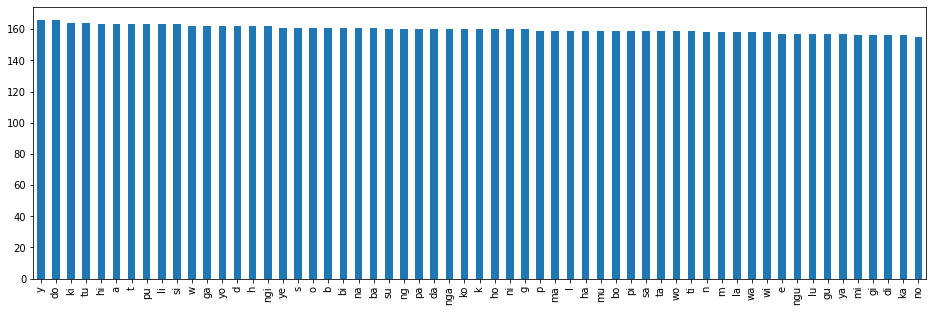

In [14]:
validate_df['character'].value_counts().plot.bar(figsize=(16,5))

In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, padding = 'Same', activation ='relu', input_shape = (32,32,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, padding  = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(216, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(59, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [16]:
#callbacks
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.2, min_lr=0.00001)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
mc = ModelCheckpoint('BRM.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [17]:
from timeit import default_timer as timer

class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

In [18]:
history = model.fit(train_generator, validation_data=validation_generator,
                    validation_steps=total_validate/64,
                    steps_per_epoch=total_train/64, epochs= EPOCHS,
                    callbacks=[lr, es, mc, cb])

classifier_json = model.to_json()
with open("BRM.json", "w") as json_file:
    json_file.write(classifier_json)

Epoch 1/50
590/590 [==============================] - 782s 1s/step - loss: 3.1220 - accuracy: 0.2338 - val_loss: 1.5685 - val_accuracy: 0.5480

Epoch 00001: val_accuracy improved from -inf to 0.54799, saving model to BRM.h5
Epoch 2/50
590/590 [==============================] - 17s 29ms/step - loss: 1.1514 - accuracy: 0.6634 - val_loss: 0.3797 - val_accuracy: 0.8914

Epoch 00002: val_accuracy improved from 0.54799 to 0.89142, saving model to BRM.h5
Epoch 3/50
590/590 [==============================] - 17s 29ms/step - loss: 0.6640 - accuracy: 0.7993 - val_loss: 0.2432 - val_accuracy: 0.9284

Epoch 00003: val_accuracy improved from 0.89142 to 0.92839, saving model to BRM.h5
Epoch 4/50
590/590 [==============================] - 17s 29ms/step - loss: 0.4597 - accuracy: 0.8596 - val_loss: 0.1687 - val_accuracy: 0.9479

Epoch 00004: val_accuracy improved from 0.92839 to 0.94788, saving model to BRM.h5
Epoch 5/50
590/590 [==============================] - 17s 30ms/step - loss: 0.3479 - accurac

590/590 [==============================] - 17s 28ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0276 - val_accuracy: 0.9940

Epoch 00038: val_accuracy did not improve from 0.99417
Epoch 39/50
590/590 [==============================] - 17s 28ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0289 - val_accuracy: 0.9937

Epoch 00039: val_accuracy did not improve from 0.99417
Epoch 40/50
590/590 [==============================] - 17s 28ms/step - loss: 0.0127 - accuracy: 0.9956 - val_loss: 0.0282 - val_accuracy: 0.9932

Epoch 00040: val_accuracy did not improve from 0.99417
Epoch 00040: early stopping


In [19]:
trainingtime= sum(cb.logs)
ttime = time.strftime('%H:%M:%S', time.gmtime(trainingtime))
print("Training time: " + ttime)

Training time: 00:24:15


In [20]:
score = model.evaluate(validation_generator)
print("Validation %s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print("Validation %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

148/148 [==============================] - 3s 22ms/step - loss: 0.0282 - accuracy: 0.9932
Validation loss: 2.82%
Validation accuracy: 99.32%


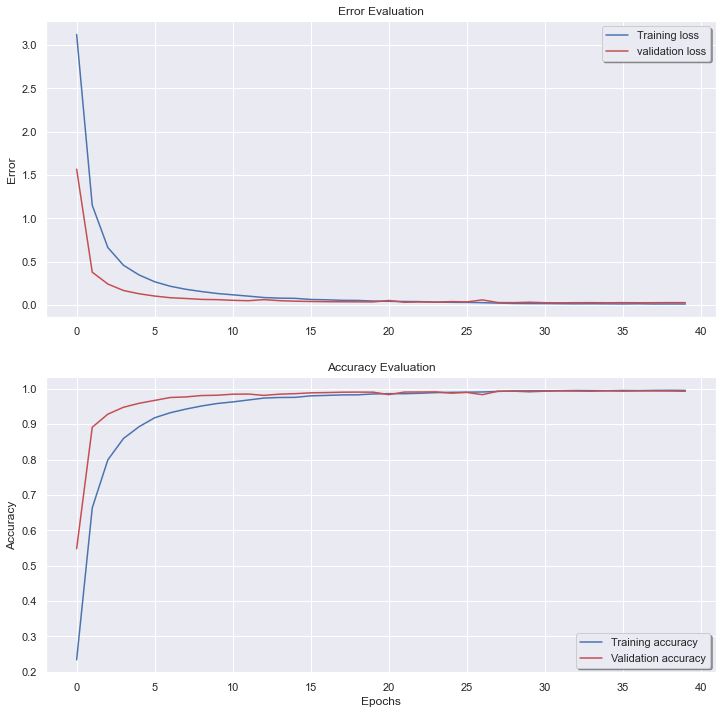

In [21]:
sns.set(rc={'figure.figsize':(12,12)})
fig, ax = plt.subplots(2,1)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_title('Accuracy Evaluation')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epochs')
legend = ax[1].legend(loc='best', shadow=True)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_title('Error Evaluation')
ax[0].set_ylabel('Error')
legend = ax[0].legend(loc='best', shadow=True)